## Life cycle of Machine learining project
 - Understanding the problem statement
 - Data Collection
 - Data checks to perform
 - Exploratory data analysis
 - Data pre-processing
 - Data modeling
 - Choose the model

### 1) Problem Statement
- This projects usderstand how the student's perfromance (test score) is affected by other variables such as gender, Ethinicity, Parental level of education, lunch and test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [1]:
# Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import csv data using pandas

In [3]:
df = pd.read_csv('data/student_details.csv')
# Top 5 record from the dataset
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### shape of the dataset 


In [5]:
print(f'Shape of the dataset is {df.shape}')

Shape of the dataset is (1000, 8)


### 2.2 Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform
    
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column


### 3.1 Checking Missing values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There is no missing values in our dataset

### 3.2 Check Duplicates

In [8]:
df.duplicated().sum()

0

Our dataset doesn't contain duplicate value

### 3.3 Check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- Only 3 column are of int type i.e math_score, reading_score, writing_score.
- Others column are of Obj type.

### 3.4 Number of unique value in each column.

In [16]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Gender column has two unique value i.e male and female, race_ethnicity has 5 and so on

### 3.5 Statical Status of the dataset

In [18]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


 #### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05
- All standard deviations are also close - between 14.6 and 15.19
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17


### 3.6 Categories present in different column

In [27]:
numerical_features = ['math_score', 'reading_score', 'writing_score']

for i in df.columns:
        if i not in numerical_features:
            print(f'Categories in {i} are {df[i].unique()}')

Categories in gender are ['female' 'male']
Categories in race_ethnicity are ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch are ['standard' 'free/reduced']
Categories in test_preparation_course are ['none' 'completed']


### 3.7 Seperate numerical and categorical features.

In [29]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print(f'Categorical features in a dataset are {categorical_features}')

Categorical features in a dataset are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [30]:
# For numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print(f'Categorical features in a dataset are {numerical_features}')

Categorical features in a dataset are ['math_score', 'reading_score', 'writing_score']


### Creating and adding 'total_score' and 'avg_score' in df

In [32]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [34]:
# For average
df['avg_score'] = df.total_score / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Let's see who got full marks.



In [39]:
math_full = df[df['math_score'] == 100]['avg_score'].count()
print(f'{math_full} students got full mark in math')

writing_full = df[df['writing_score'] == 100]['avg_score'].count()
print(f'{writing_full} students got full mark in writing')



reading_full = df[df['reading_score'] == 100]['avg_score'].count()
print(f'{reading_full} students got full mark in reading')

7 students got full mark in math
14 students got full mark in writing
17 students got full mark in reading


In [42]:
math_less_20 = df[df['math_score'] <= 20]['avg_score'].count()
print(f'{math_less_20} students who got less than 20 mark in math')

reading_less_20 = df[df['reading_score'] <= 20]['avg_score'].count()
print(f'{reading_less_20} students who got less than 20 mark in reading')

writing_less_20 = df[df['writing_score'] <= 20]['avg_score'].count()
print(f'{writing_less_20} students who got less than 20 mark in writhing')


4 students who got less than 20 mark in math
1 students who got less than 20 mark in reading
3 students who got less than 20 mark in writhing


### 4. Exploring Data ( Visualization )

#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)


### 4.1.1 Histogram and KDE

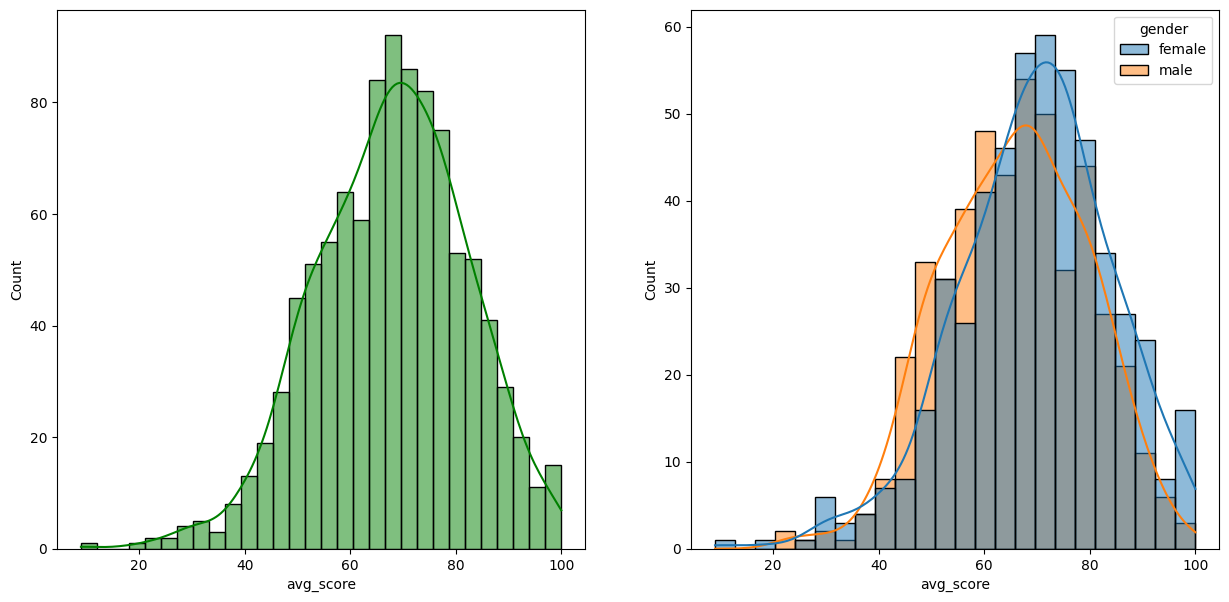

In [51]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='avg_score', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='avg_score', kde=True, hue = 'gender')

plt.show()

  #####  Insights
- Female students tend to perform well then male students.

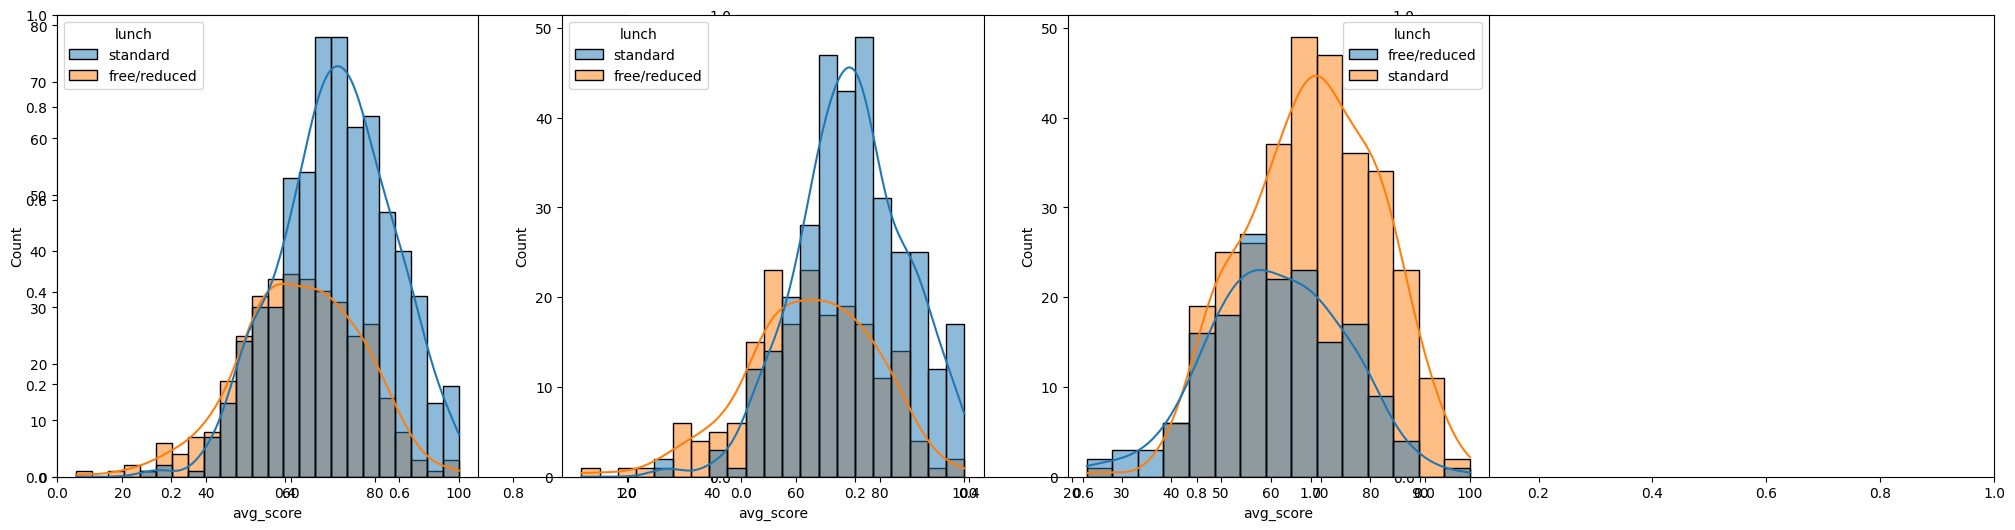

In [53]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avg_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams
- Standard lunch helps perform well in exams be it a male or a female


In [54]:
df.to_csv('modified_student_details.csv', index=False)